### Regression Assignment

#### Import necessary libraries

In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Dataset

In [8]:
housing = fetch_california_housing()

In [10]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

#### Concatenate for inspection

In [13]:
df = pd.concat([X, y], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Preprocessing Dataset

In [18]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [20]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### Regression Algorithm Implementation

In [23]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#### Splitting Data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

##### 1. Linear Regression

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


##### Linear Regression - Explanation:
###### Assumes a linear relationship between independent variables and the target.
###### Good baseline model, simple and interpretable.

##### 2. Decision Tree Regressor

In [36]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


##### Decision Tree Regressor - Explanation:
###### Tree-based, non-linear regression
###### Captures complex patterns but prone to overfitting.

##### 3. Random Forest Regressor

In [39]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


##### Random Forest Regressor - Explanation:
###### Ensemble of Decision Trees.
###### Reduces overfitting and improves accuracy.

##### 4. Gradient Boosting Regressor

In [42]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


##### Gradient Boosting Regressor - Explanation:
###### Builds trees sequentially to minimize loss.
###### Powerful for structured/tabular data.

##### 5. Support Vector Regressor (SVR)

In [45]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)


##### Support Vector Regressor - Explanation:
###### Maximizes the margin of tolerance.
###### Performs well with scaled data, suitable for small to medium datasets.

#### Model Evaluation and Comparison

In [59]:
def evaluate_model(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return pd.Series([mse, mae, r2], name=name)

results = pd.concat([
    evaluate_model(y_test, y_pred_lr, "Linear Regression"),
    evaluate_model(y_test, y_pred_dt, "Decision Tree"),
    evaluate_model(y_test, y_pred_rf, "Random Forest"),
    evaluate_model(y_test, y_pred_gb, "Gradient Boosting"),
    evaluate_model(y_test, y_pred_svr, "SVR")
], axis=1)

results.index = ['MSE', 'MAE', 'R²']
results.T.sort_values('R²', ascending=False)


,MSE,MAE,R²
Random Forest,0.255498,0.327613,0.805024
Gradient Boosting,0.293999,0.371650,0.775643
SVR,0.355198,0.397763,0.728941
Decision Tree,0.494272,0.453784,0.622811
Linear Regression,0.555892,0.533200,0.575788


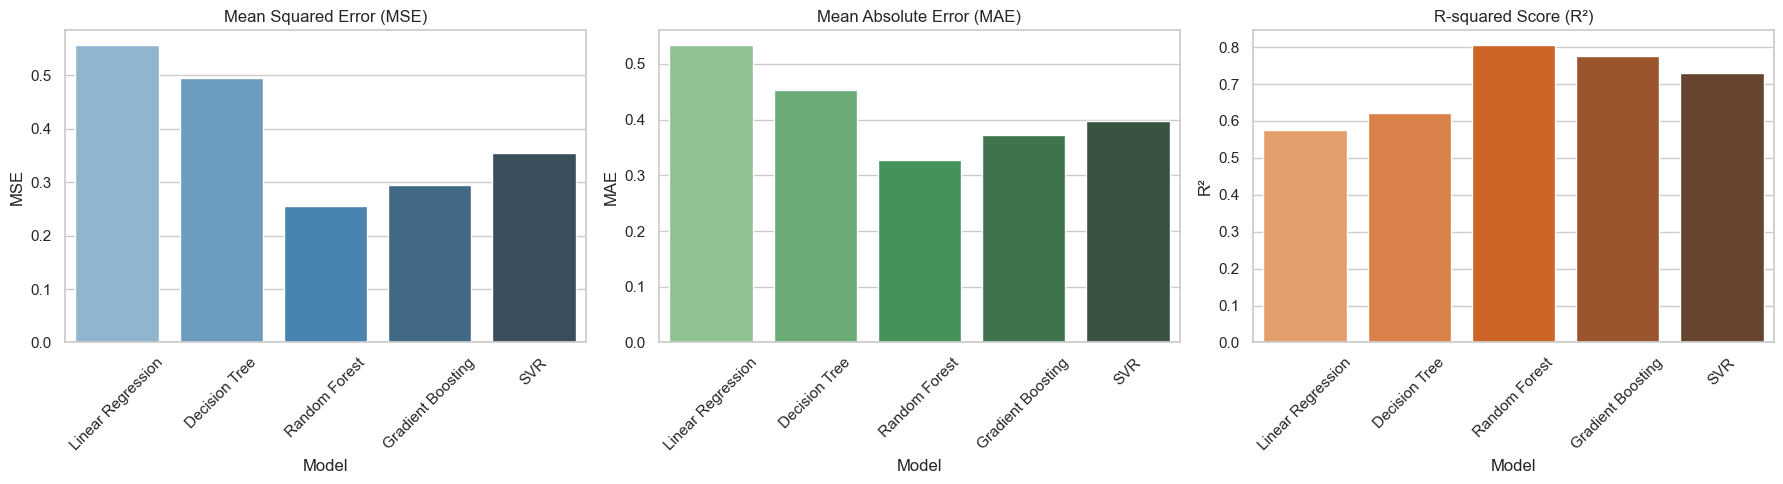

In [66]:
# Transpose results for plotting
results_plot = results.T.reset_index().rename(columns={'index': 'Model'})

# Set the plot style
plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")

# MSE Plot
plt.subplot(1, 3, 1)
sns.barplot(data=results_plot, x='Model', y='MSE', hue='Model', palette='Blues_d', legend=False)
plt.xticks(rotation=45)
plt.title('Mean Squared Error (MSE)')

# MAE Plot
plt.subplot(1, 3, 2)
sns.barplot(data=results_plot, x='Model', y='MAE', hue='Model', palette='Greens_d', legend=False)
plt.xticks(rotation=45)
plt.title('Mean Absolute Error (MAE)')

# R² Score Plot
plt.subplot(1, 3, 3)
sns.barplot(data=results_plot, x='Model', y='R²', hue='Model', palette='Oranges_d', legend=False)
plt.xticks(rotation=45)
plt.title('R-squared Score (R²)')

plt.tight_layout()
plt.show()


#### Summary

#### Best: Most likely Random Forest or Gradient Boosting (higher R², lower errors)
#### Worst: Typically SVR (slow and less accurate on large data unless tuned heavily)